# Fixed Income Derivatives - The Ho-Lee Model
In this problem, we will consider the Ho-Lee model, in which the short rate $r_t$ is assumed to have the following dynamics under the risk-neutral measure $\mathbb{Q}$:
$$dr_t = \theta_t dt + \sigma dW_t$$
where $\theta_t$ and $\sigma$ are model parameters.

In [1]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
import numpy as np
from scipy.optimize import minimize

# add the directory
import sys
import os
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid
import plotting as plot

%load_ext autoreload
%autoreload 2

## Problem 1 - Zero coupon bond prices in the Ho-Lee model
Let us recall that the Ho-Lee model possesses an affine term structure and that zero coupon bond prices
are of the form:
$$
\begin{split}
P(t, T) &= e^{A(t,T) - B(t,T)r_t} \\
A(t,T) &= \frac{\sigma^2}{2}\frac{(T-t)^3}{3} + \int_t^T \theta_s ds \\
B(t,T) &= T-t
\end{split}
$$
Let us denote observed prices at time $0$ of maturity $T$ zero coupon bonds by $p^*(0,T)$ and observed forward rates by $f^*(0,T)$.

***See ChatGPT for proposed solution***

***Notes from class (commented out):***

<!-- \begin{align*}
\Theta(t) &= \frac{\partial}{\partial T}f^*(0,t)+\sigma^2 t \\
A(t,T) &= \frac{\sigma^2}{6} (T-t)^3 + \int_{t}^{T}\Theta(s)(s-t)ds \\
u &= \int_{t}^{T}(\frac{\partial}{\partial T}f^*(0,s) + \sigma^2 s)(s-T)ds \\
&= \int_{t}^{T}s(\frac{\partial}{\partial T}f^*(0,s) + \sigma^2 s)ds - T\int_{t}^{T}(\frac{\partial}{\partial T}f^*(0,s) + \sigma^2 s)ds \\
&= I_1 - I_2 \\
I_1 &= \int_{t}^{T}s(\frac{\partial}{\partial T}f^*(0,s) + \sigma^2 s)ds = \sigma^2 \frac{1}{3} [s^3]_t^T
\end{align*}

\begin{align*}
f(0,T) &= \frac{\partial}{\partial T}P(0,T) \quad \text{Instantaneous forward rate} \\
f(0,0) &= r_0 \quad \text{Forward rate at time 0,} \\ &\qquad \qquad \text{is equal to the short rate at time 0} \\
\end{align*}

\begin{align*}
dM_t &= a(t)dt + bdWt \\
M_t \vert \mathcal{F}_t &= M_t \int_{t}^{T}a(s)ds + \int_t^T b dWs \\
\end{align*} -->

#### (a) We have previously shown that $\Theta(t) = \frac{\partial f^*(0,t)}{\partial T} + \sigma^2 t$ where $\frac{\partial}{\partial T}$ refers to derivative with respect to the second argument of $f^*(0,t)$. Use this and integration by parts to show that ZCB prices in the Ho-Lee model are given by $$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}\exp\left\{(T-t)f^*(0,t)-\frac{\sigma^2}{2}t(T-t)^2 - (T-t)r_t\right\}$$

#### (b) Use the expression for ZCB prices at the begining, $P(t,T)$, to show that the dynamics of ZCB prices in the Ho-Lee model are $$dP(t,T) = r_tP(t,T)dt + \sigma (T-t) P(t,T)dW_t$$

#### (c) For $u$ such that $t < u < T$ find a solution to $dP(t,T)$ from (b)

#### (d) Show that $\ln{P(u,T)\mid \mathcal{F}_t}$ follows a log-normal distribution and find the mean and variance of $\ln{P(u,T)}$.

#### (e) Use integration by parts to express the solution for $r_T$ given $\mathcal{F}_t$ in terms of $f^*$ and find the distribution of $r_T\mid \mathcal{F}_t$.

## Problem 2 - Option prices in the Ho-Lee model
In this problem, we will consider a European call option with time $t$ price denoted $\Pi(t; T_1,T_2)$, strike $K$ and exercise at $T_1$ on a maturity $T_2$ zero coupon bond where of course $t < T_1 < T_2$. It is tempting to try to use the results from Problem 1 to find the price of the European call option and though it can be done, there is a much simpler solution that we will pursue.

***See ChatGPT for proposed solution***

#### (a) Argue that $\Pi(t,T)$ can be found using the following version of our general option pricing formula $$\Pi(t;T_1,T_2) = P(t,T_2)\mathbb{Q}^{T_2}\left(P(T_1,T_2)\geq K\right) - Kp(t,T_1)\mathbb{Q}^{T_1}\left(P(T_1,T_2)\geq K\right)$$

#### (b) Find the dynamics of $Y (t) = \frac{P (t,T_1)}{P (t,T_2)}$ and use the fact that $Y (t)$ is martingale under $\mathbb{Q}^{T_2}$ with same diffusion coefficient as under $\mathbb{Q}$ to solve for $Y (T_1)$. Next, use this solution to find $\mathbb{Q}^{T_2}(P(T1,T2) \geq K)$

#### (c) Find the dynamics of $Z(t) = \frac{P (t,T_2)}{P (t,T1)}$ and use the fact that $Z(t)$ is martingale under $\mathbb{Q}^{T_1}$ with same diffusion coefficient as under $\mathbb{Q}$ to solve for $Z(T_1)$. Next, use this solution to find $\mathbb{Q}^{T_1}(P(T_1,T_2) \geq K)$ 

#### (d) Finally, use your results to conclude that $$\Pi(t;T_1,T_2) = P(t,T_2)\Phi(d)-KP(t,T_1)\Phi(d-\sigma_p),$$ $$d=\frac{1}{\sigma_p} \ln{\left[\frac{p(t,T_2)}{p(t,T_1)K}\right]}+\frac{1}{2}\sigma_p, \quad \sigma_p = \sigma(T_2-T_1)\sqrt{T_1-t}$$

## Problem 3 - Fitting the yield curve and Vasicek model

For this problem, we assume you have the following market data available and that the interest rate swaps pay 6M EURIBOR semiannually against a fixed rate paid annually

$$
\begin{array}{|c|c|c|c|c|c|}
\hline
\textbf{EURIBOR} & \textbf{Fixing} & \textbf{FRA} & \textbf{Midquote (FRA)} & \textbf{IRS} & \textbf{Midquote (IRS)} \\ \hline
6M & 0.0430136 & 1X7 & 0.0455066 & 2Y & 0.0558702 \\ 
 &  & 2X8 & 0.0477436 & 3Y & 0.058811 \\ 
 &  & 3X9 & 0.0497492 & 4Y & 0.0600937 \\ 
 &  & 4X10 & 0.0515456 & 5Y & 0.0605263 \\ 
 &  & 5X11 & 0.0531529 & 7Y & 0.0601899 \\ 
 &  & 6X12 & 0.0545893 & 10Y & 0.0588669 \\ 
 &  & 7X13 & 0.0558712 & 15Y & 0.0562267 \\ 
 &  & 8X14 & 0.0570135 & 20Y & 0.0547351 \\ 
 &  & 9X15 & 0.0580298 & 30Y & 0.0535523 \\ \hline
\end{array}
$$


#### (a) Fit a ZCB spot rate curve to the market data and plot spot and forward rates from your choice of interpolation method. Also discuss if the spot and forward rates from your fit have the properties that we would like fitted spot- and forward rates to have

In [2]:
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate": 0.0430136}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.0455066},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.0477436},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.0497492},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.0515456},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.0531529},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.0545893},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.0558712},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.0570135},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.0580298}]
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.0558702, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.058811, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.0600937, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.0605263, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.0601899, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.0586669, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.0562267, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.0547351, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.0535523, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market

In [3]:
resolution = 12 # points per year (the fid.interpolate fundtion later requires overlap of T_fit and T_inter. As we have FRA data monthly 15 months ahead, we must have monthly data for this as a minimum)
interpolation_options = {"method":"nelson_siegel","transition": 'smooth'}
T_fit, R_fit = fid.zcb_curve_fit(data,interpolation_options =interpolation_options)
T_res = np.array([i*(1/resolution) for i in range(0,int(T_fit[-1])*resolution + 1)])

p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter=T_res,T=T_fit,R=R_fit,interpolation_options = interpolation_options)

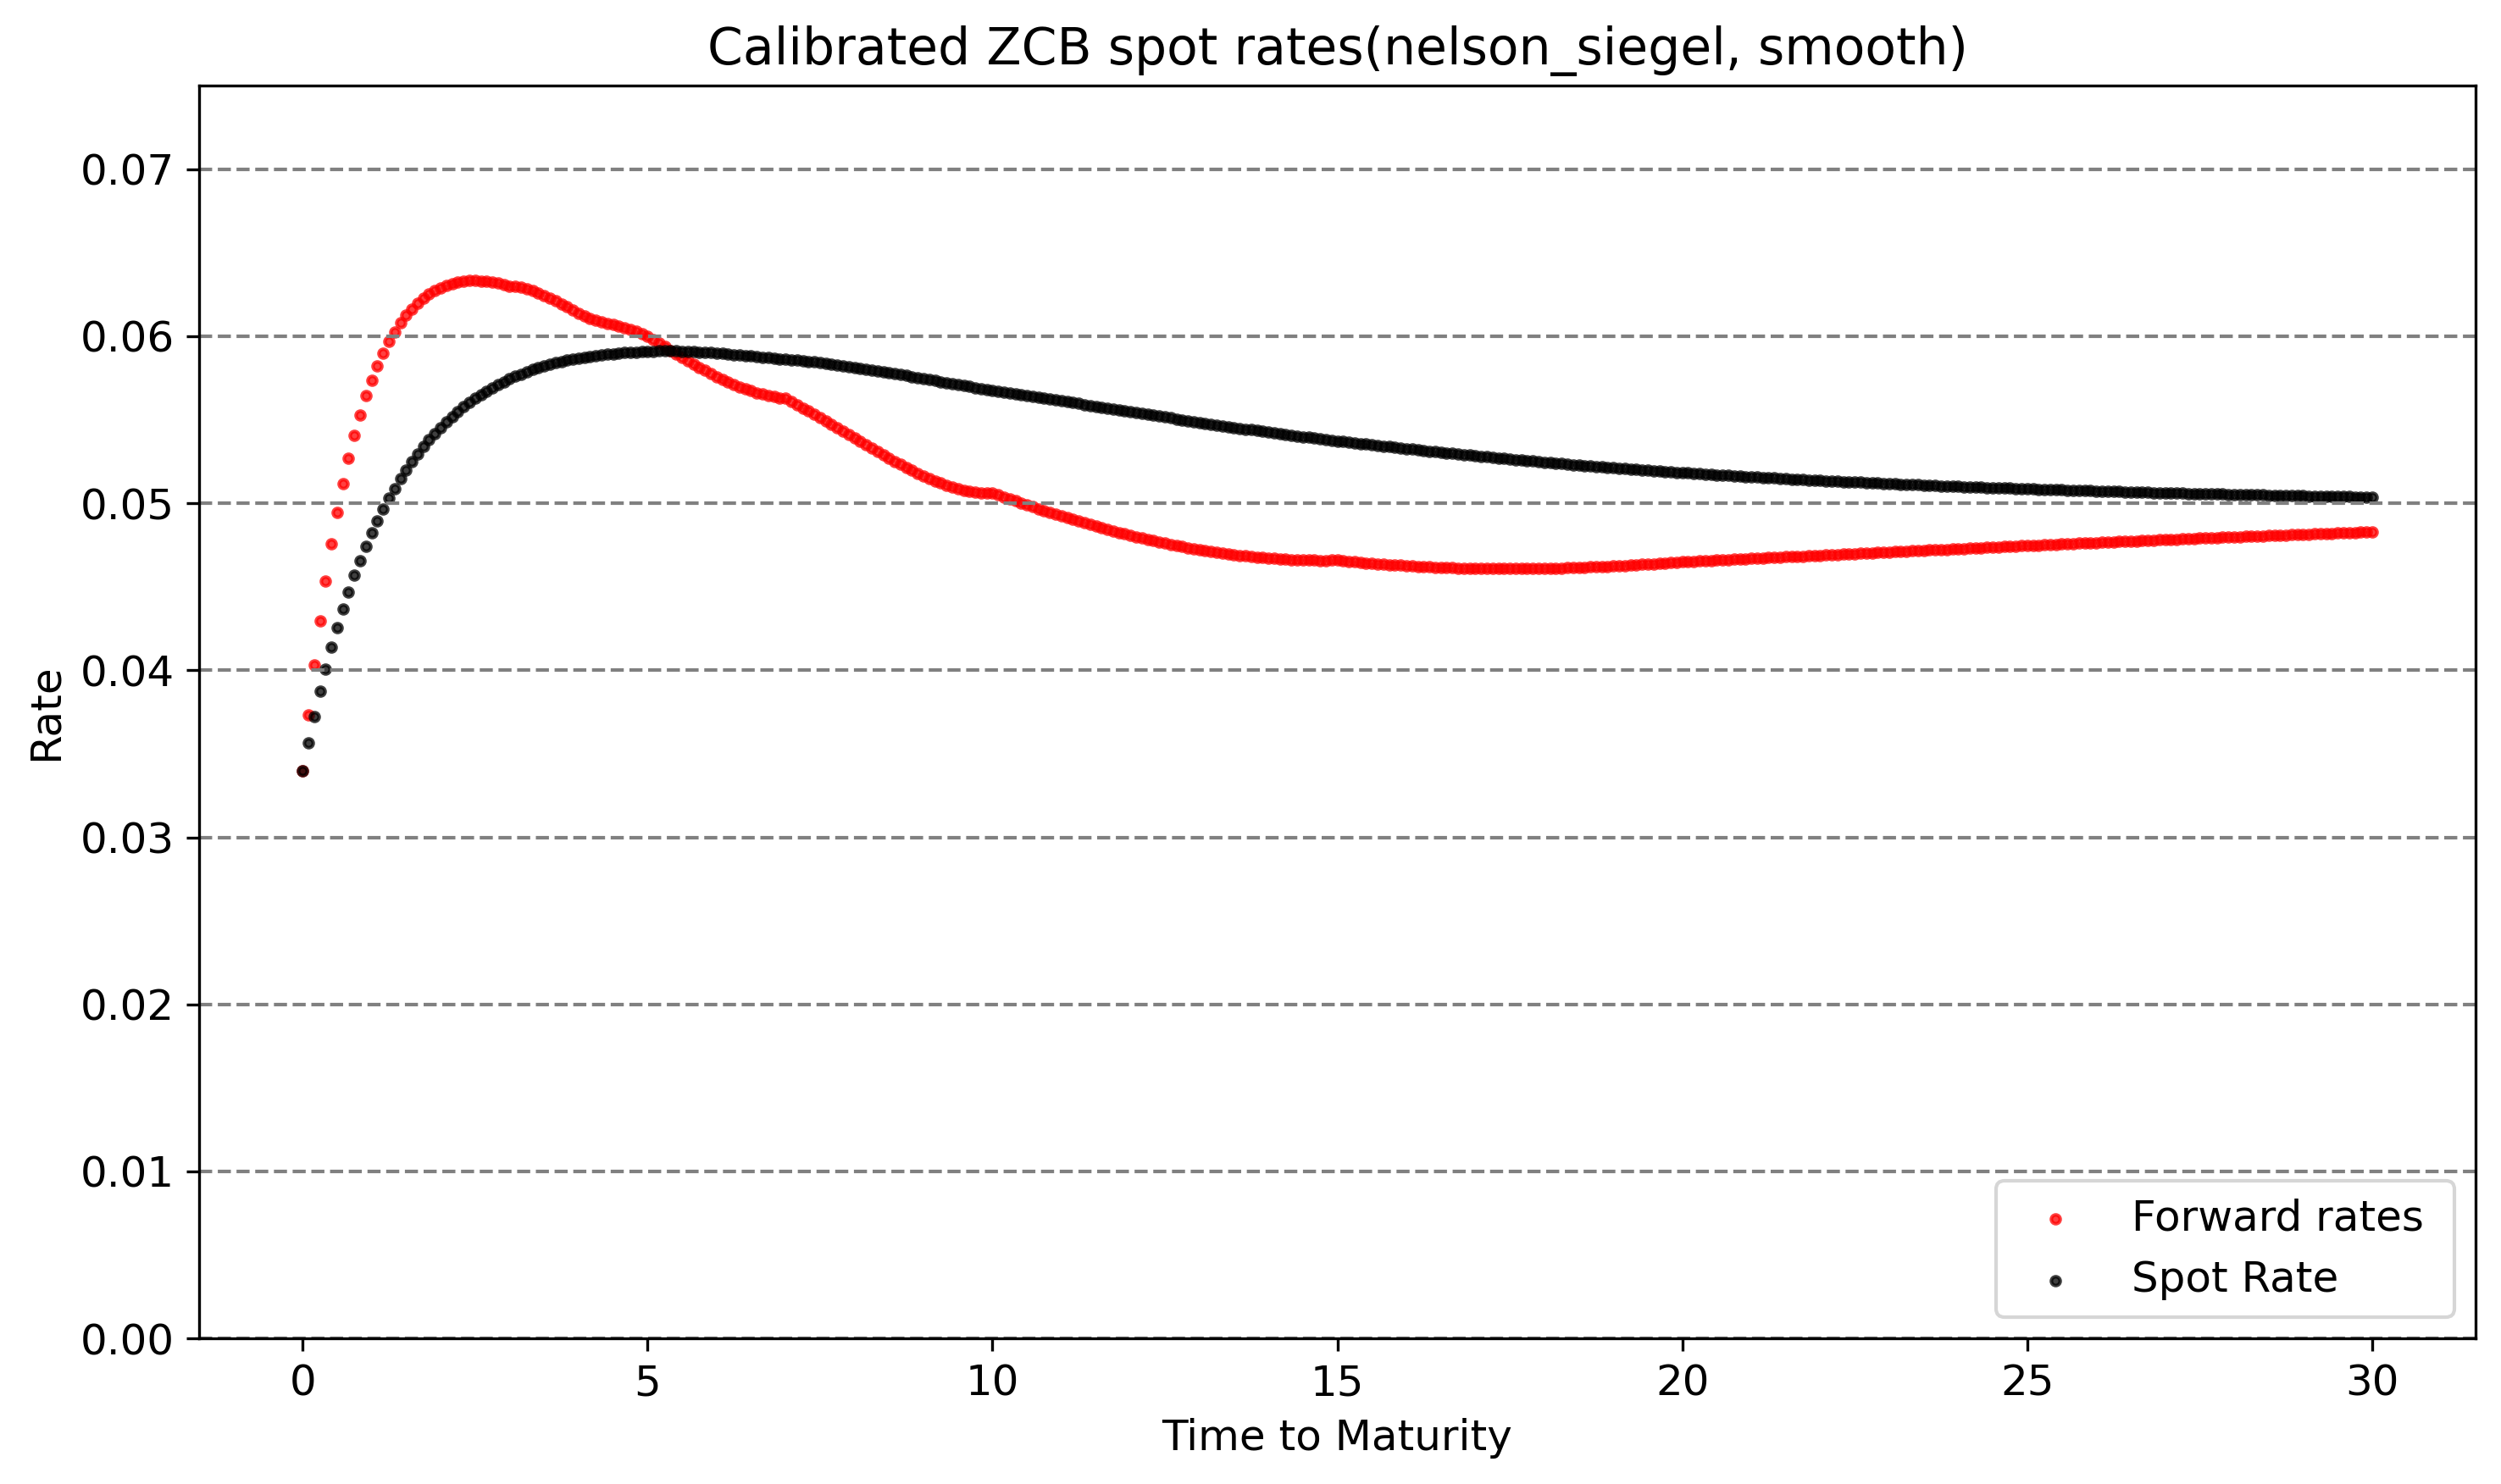

In [4]:
fit = [{'label':'Forward rates', 'x':T_inter, 'y':f_inter, 's':25,'color':'red'},
       {'label':'Spot Rate', 'x':T_inter, 'y':R_inter,'color':'black','s':25}]

plot.rates(fit,title=f'Calibrated ZCB spot rates({interpolation_options["method"]}, {interpolation_options["transition"]})')

We want the spot and forward rates to be smooth as we are using its deriatives when choosing $\Theta$ Vasicek will likely fit bad to the data as we have a hump-shaped curve, which it cannot handle. It can only handle a monotonically increasing or decreasing curve (or flat); hence, we expect a bad fit in the next question.

#### (b) Using the initial values $r_0 = 0.035$, $a = 0.5$, $b = 0.025$, $\sigma = 0.03$, fit a Vasicek model to the ZCB spot rates you have calibrated from market data

In [5]:
r0, a, b, sigma = 0.035, 0.5, 0.025, 0.03
param0 = r0, a, b, sigma
result = minimize(fid.fit_vasicek_obj,param0,method='nelder-mead',args=(R_inter,T_inter),options={'xatol': 1e-20,'disp': True})
print(f'Parameters from the fit: {result.x}. SSE of the fit: {result.fun}')
rhat, ahat, bhat, sigmahat = result.x

Parameters from the fit: [ 3.07469615e-02  6.77802831e+00  3.67700588e-01 -4.19302497e-09]. SSE of the fit: 0.0037497322100322624


#### (c) Plot the fitted spot- and forward rates from your Vasicek model in a plot that also contains the spot and forward rates you found in a)

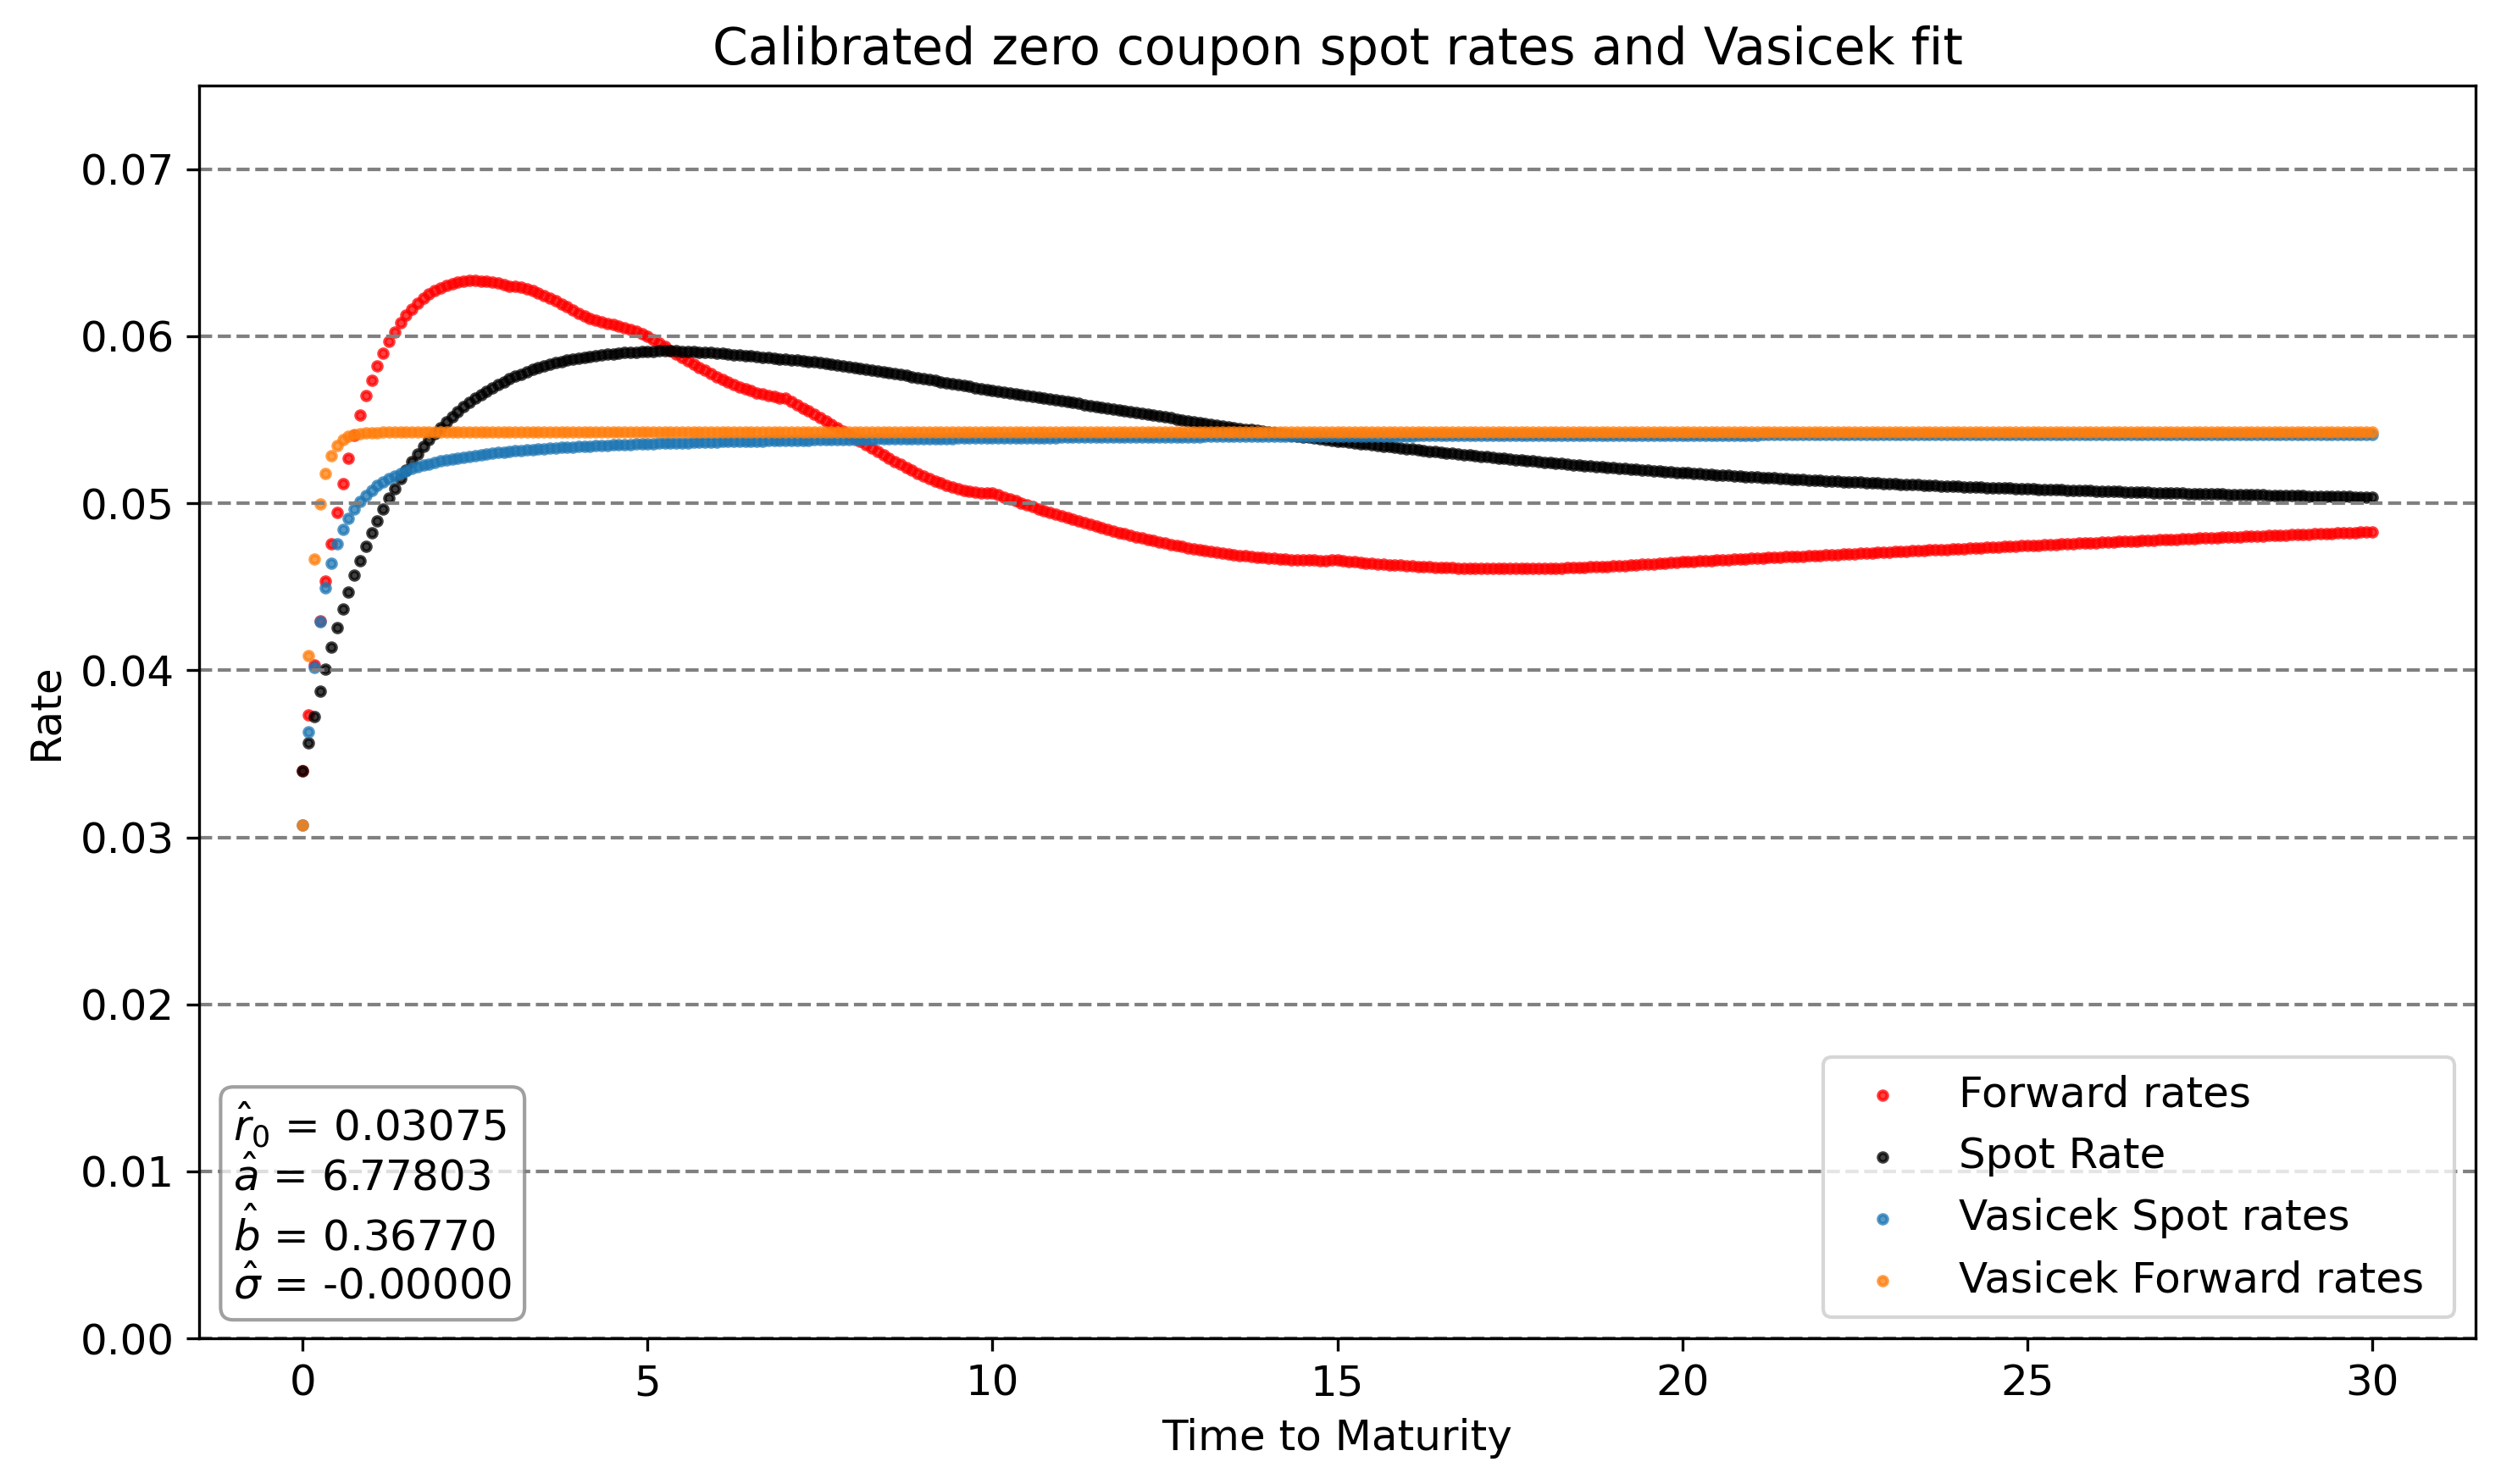

In [6]:
p_vasicek = fid.zcb_price_vasicek(rhat,ahat,bhat,sigmahat,T_inter)
f_vasicek = fid.forward_rate_vasicek(rhat,ahat,bhat,sigmahat,T_inter)
R_vasicek = fid.spot_rate_vasicek(rhat,ahat,bhat,sigmahat,T_inter)

fit_vasicek = fit.copy()
fit_vasicek.append({'label':'Vasicek Spot rates', 'x':T_inter, 'y':R_vasicek,'s':25})
fit_vasicek.append({'label':'Vasicek Forward rates', 'x':T_inter, 'y':f_vasicek,'s':25})
text = {'$\hat{r}_0$':rhat,'$\hat{a}$':ahat,'$\hat{b}$':bhat,'$\hat{\sigma}$':sigmahat}

plot.rates(fit_vasicek,title='Calibrated zero coupon spot rates and Vasicek fit',text=text)

#### (d) You are likely to have found that the Vasicek model does not fit the market data very well. Try to explain why the Vasicek model never really stood a chance considering the spot rate curve you got in a).

As previously mentioned and as we see in the plot Vasicek fit very bad to the data as we have a hump-shaped curve, which it cannot handle. It can only handle a monotonically increasing or decreasing curve (or flat); hence we see that it does not capture the hump or the following decrease at all

## Problem 4 - Fitting a Ho-Lee model to the data
In this problem, we will fit a Ho-Lee model to our market data and you can assume that $\sigma = 0.005$

#### (a) Use the function `fid.interpolate` to first find $\frac{\partial f^*(0,t)}{\partial T}$ and then find $\Theta(t)$

In [7]:
sigma = 0.005
f_fit = np.array(fid.for_values_in_list_find_value_return_value(T_fit,T_inter,f_inter))
f_star, f_T_star = fid.interpolate(T_inter,T_fit,f_fit,interpolation_options)
theta_star = fid.theta_ho_lee(T_inter,sigma,f_T=f_T_star,method='default')

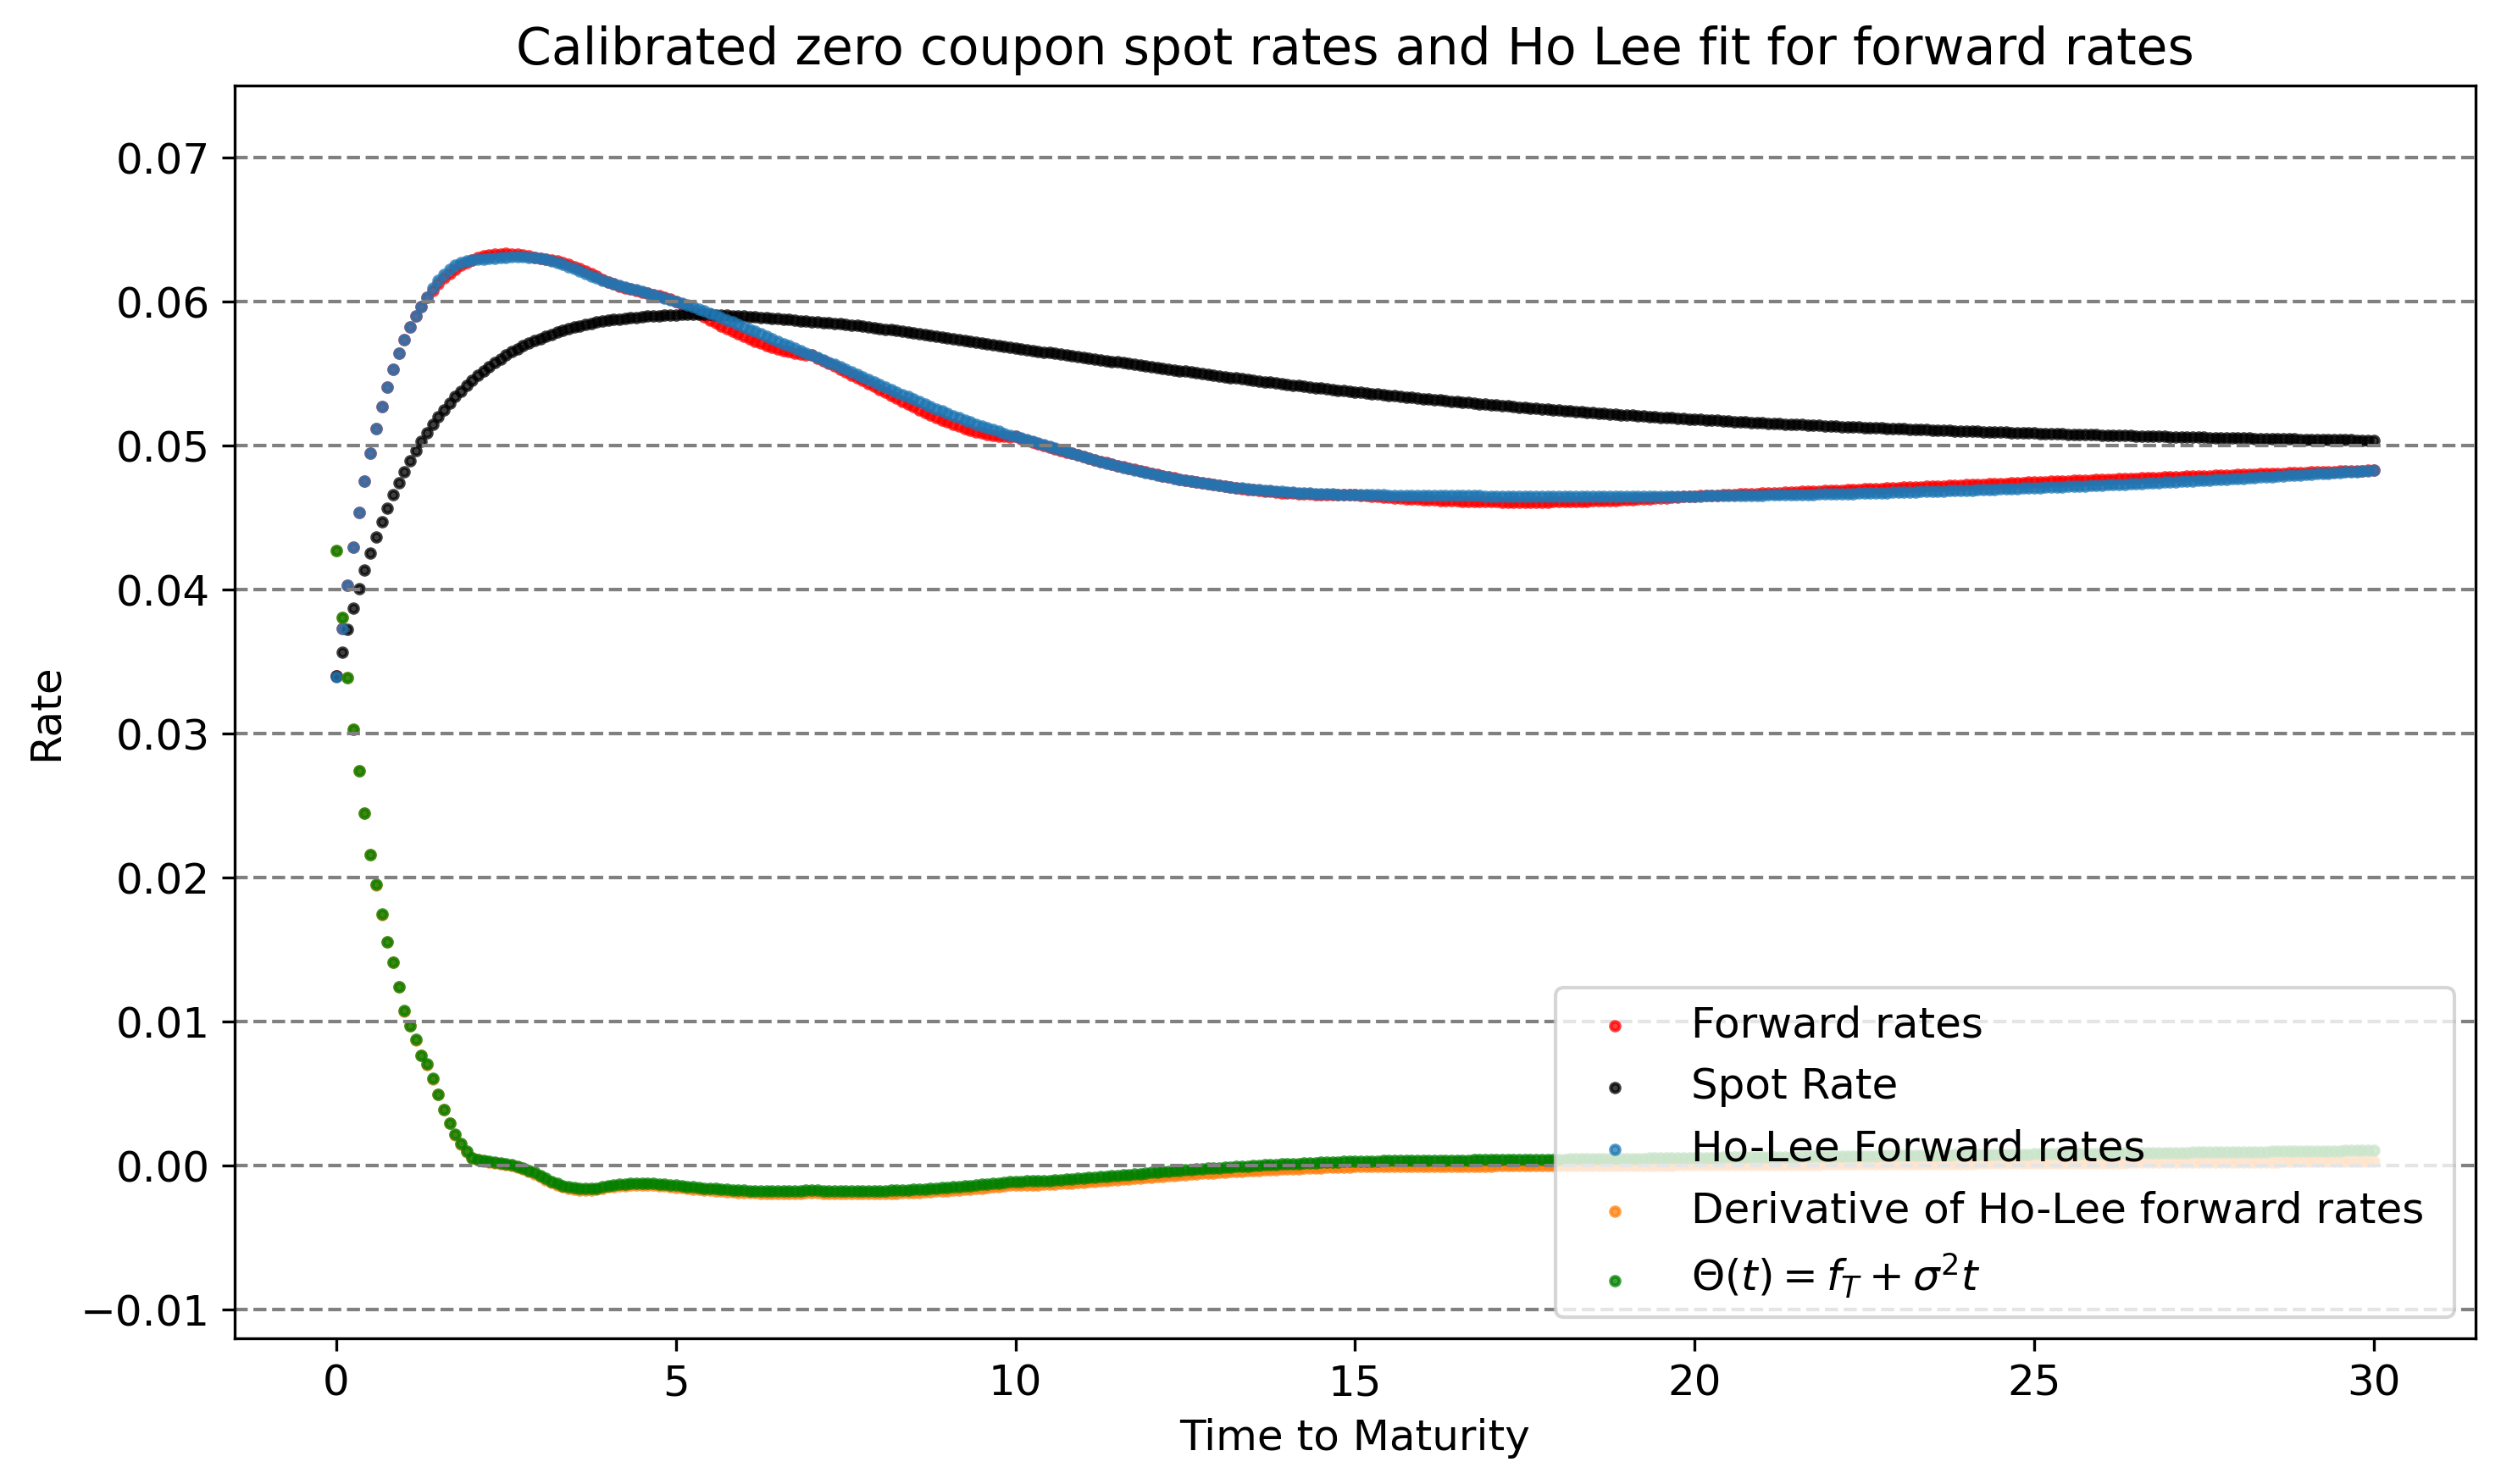

In [8]:
fit_ho_lee = fit.copy()
fit_ho_lee.append({'label':'Ho-Lee Forward rates', 'x':T_inter, 'y':f_star,'s':25})
fit_ho_lee.append({'label':'Derivative of Ho-Lee forward rates', 'x':T_inter, 'y':f_T_star,'s':25})
fit_ho_lee.append({'label':'$\Theta(t) = f_T + \sigma^2 t$', 'x':T_inter, 'y':theta_star,'s':25,'color':'green'})

plot.rates(fit_ho_lee,title='Calibrated zero coupon spot rates and Ho Lee fit for forward rates')

#### (b) Argue that the Ho-Lee model will by construction fit the initial term structure by appealing to $$p(t,T) = \frac{p^*(0,T)}{p^*(0,t)}\exp\left\{(T-t)f^*(0,t)-\frac{\sigma^2}{2}t(T-t)^2 - (T-t)r_t\right\}$$
The Ho-Lee model (and the Hull-White extended Vasicek) is specifically designed to align with the observed market as the The drift parameter $\Theta(t)$ is a function and the parameter space in the Ho-Lee model is infinite dimensional. Therefore, we are, unlike in the Vasicek and CIR mdoels, able to choose the function $\Theta(t)$ in the Ho-Lee model such that we get a perfect fit of the initial term structure data at the initial time. 

By calibrating its parameters based on the current term structure of interest rates, it guarantees that the model accurately reflects the initial term structure, making it inherently consistent with the market's starting point. As a result, the Ho-Lee model seamlessly fits the initial term structure by construction, providing a reliable foundation for pricing and hedging interest rate derivatives.

## Problem 5 - Pricing an interest rate cap in the Ho-Lee model
We will now consider the pricing of an interest rate cap on a 10Y receiver swap in which the holder receives a an annual fixed rate in exchange for paying 6M Euribor on the floating leg. As in the previous question, you can assume that $a = 0.15$ $\sigma = 0.05$

#### (a) Explain the relationship between a caplet on an individual Euribor rate payment and also explain, how a caplet can be seen as a type of European option on a specific underlying asset
A caplet provides the holder the right to receive a payment if a specific Euribor rate exceeds a predetermined strike rate during a single interest period. Essentially, each caplet is tied to an individual Euribor rate payment, offering protection against rising interest rates for that period. Furthermore, a caplet functions similarly to a European call option, where the Euribor rate serves as the underlying asset. Just as a European option grants the right to buy an asset at a set price by a certain date, a caplet grants the right to benefit from higher-than-expected interest rates at a specific future time.

#### (b) Derive an explicit expression for the price of a European put option with the ZCB as the underlying asset

***See ChatGPT for proposed solution***

#### (c) Compute the prices of all caplets on 6M forward Euribor with a strike of $K = 0.06$ corresponding to the floating rate payments on the 10Y receiver swap and use these prices to find

In [9]:
strike = 0.06
sigma = 0.005
alpha = 0.5 # semiannual payments
T_cap = 10 # years
M_caplet = int(T_cap/alpha)
T_caplet = np.array([i*alpha for i in range(0,M_caplet+1)])
p_caplet = fid.for_values_in_list_find_value_return_value(T_caplet,T_inter,p_inter)
price_caplet = np.zeros([M_caplet+1])
for i in range(2,M_caplet+1):
    price_caplet[i] = (1 + (T_caplet[i]-T_caplet[i-1])*strike)*fid.euro_option_price_ho_lee(1/(1 + (T_caplet[i]-T_caplet[i-1])*strike),T_caplet[i-1],T_caplet[i],p_caplet[i-1],p_caplet[i],sigma,type = "put")
price_cap = sum(price_caplet[2:])
print(f"Caplet prices: {10000*price_caplet}")

Caplet prices: [ 0.          0.          0.52217705 10.55557324 19.78473489 23.90976865
 24.44282718 23.86673099 21.85516056 19.67553906 18.76205329 16.71126075
 14.45738219 13.17158499 12.88001747 12.21643817 10.65560902  9.36922708
  8.43686592  7.94142148  8.01020252]


#### (d) Compute the price of a 10Y interest rate cap with strike $K = 0.06$ on 6M Euribor and express the price of this cap both in terms of an upfront payment as well as a premium to be paid quarterly for 10 years.

In [10]:
S_swap = fid.accrual_factor_from_zcb_prices(0,0,T_caplet[-1],"semiannual",T_caplet,p_caplet)
premium_cap = alpha*(price_cap/S_swap) #this is the semiannual premium not quarterly
print(f"price_cap: {10000*price_cap}, semiannual premium_cap: {10000*premium_cap}") # we assume that there is a mistake exercise and semiannual premium is meant

price_cap: 277.2245745115466, semiannual premium_cap: 18.504568233764186


#### (e) Investigate how the price of the cap depends on $\sigma$ and compute the DV01 of changing $\sigma$ by $0.001$ both up and down

In [11]:
price_caplet_down = fid.caplet_prices_ho_lee(strike,sigma-0.001,T_caplet,p_caplet)
price_cap_down = sum(price_caplet_down[2:])
premium_cap_down = alpha*(price_cap_down/S_swap)
print(f"price_cap_down: {10000*price_cap_down}, premium_cap_down: {10000*premium_cap_down}")
price_caplet_up = fid.caplet_prices_ho_lee(strike,sigma+0.001,T_caplet,p_caplet)
price_cap_up = sum(price_caplet_up[2:])
premium_cap_up = alpha*(price_cap_up/S_swap)
print(f"price_cap_up: {10000*price_cap_up}, premium_cap_up: {10000*premium_cap_up}")

price_cap_down: 225.02476230979306, premium_cap_down: 15.020263177551382
price_cap_up: 331.15141074139586, premium_cap_up: 22.10415107162948


## Problem 6 - Simulation of $r_t$ and confidence intervals in the Ho-Lee model
Now we will simulate short rates in the Ho-Lee model using the usual first order Euler scheme on a grid of mesh $\delta$ that runs from initial time $t_0$ to terminal time $T$. Denote by $M$, the number of steps in your simulation. The time points in your simulation will be numbered $m = 0,1,2,...,M−1,M$, the time points will be $[t_0,t_1,...,t_{M−1},t_M] = [0,\delta,2\delta,...,T_{-\delta},T]$ and $\delta = \frac{T}{M}$.

#### (a) Develop both an exact and an Euler scheme to simulate the short rate
**Excat scheme:**
$$
\begin{align*}
dr_t &= \Theta(t) dt + \sigma dW_t \\
&= \left[\frac{\partial}{\partial T}f^*(t,t)+\sigma^2 t\right]dt + \sigma dW_t \\
r_T &= r_t + \int_t^T (\frac{\partial}{\partial T}f^*(t,s) + \sigma^2 s)ds + \sigma \int_t^T 1 dW_s \\
&= r_t + f^*(t,T) - f^*(t,t) + \frac{1}{2}\sigma^2 (T-t)^2 + \sigma (W_t-W,t)\\
&= f^*(t,T) + \frac{1}{2}\sigma^2 (T-t)^2 + \sigma (W_t-W,t), \\ 
&\qquad \qquad (r_T \mid r_t) \sim \mathcal{N}\left(f^*(t,T)+\frac{1}{2}\sigma^2 (T-t)^2, \sigma^2(T-t)\right) \\
\end{align*}
$$

**Euler scheme:**
$$
\begin{align*}
r_{m+1} &= r_{m} + \Theta(t_{m}) \delta + \sigma \sqrt{\delta} Z_{m} \qquad \text{almost standard form of the Euler} \\
&= r_{m} + \left[\frac{\partial}{\partial T}f^*(t_{m},t_{m}) + \sigma^2 t_{m}\right] \delta + \sigma \sqrt{\delta} Z_{m} \\
Z_{m} &\sim \mathcal{N}(0, 1) \\
\end{align*}
$$

#### (b) Run the simulation of both the two schemes for $T = 10$ and plot the trajectories for both schemes. Try to use the same randomness by setting the same ’seed’ for both schemes and access if the two schemes should and also do so in practice, result in the same trajectories

In [12]:
M_simul, T_simul = 2000, 10
r0 = f_inter[0]
mesh_simul = T_simul/M_simul
t_simul = np.array([i*mesh_simul for i in range(0,M_simul+1)])
f_simul, f_T_simul = fid.interpolate(t_simul,T_fit,f_fit,interpolation_options)
np.random.seed(2025)
r_simul_euler = fid.simul_ho_lee(r0,f_T_simul,sigma,T_simul,method = "euler")        # np.random.seed(7) is good, np.random.seed(4) increases, np.random.seed(3) declines
np.random.seed(2025)
r_simul_exact = fid.simul_ho_lee(r0,f_T_simul,sigma,T_simul,method = "exact",f=f_simul)     # np.random.seed(1) is good

theta = fid.theta_ho_lee(t_simul,sigma,method = "default",f_T=f_T_simul)
mean_ho_lee, var_ho_lee = fid.mean_var_ho_lee(f_simul,sigma,t_simul)

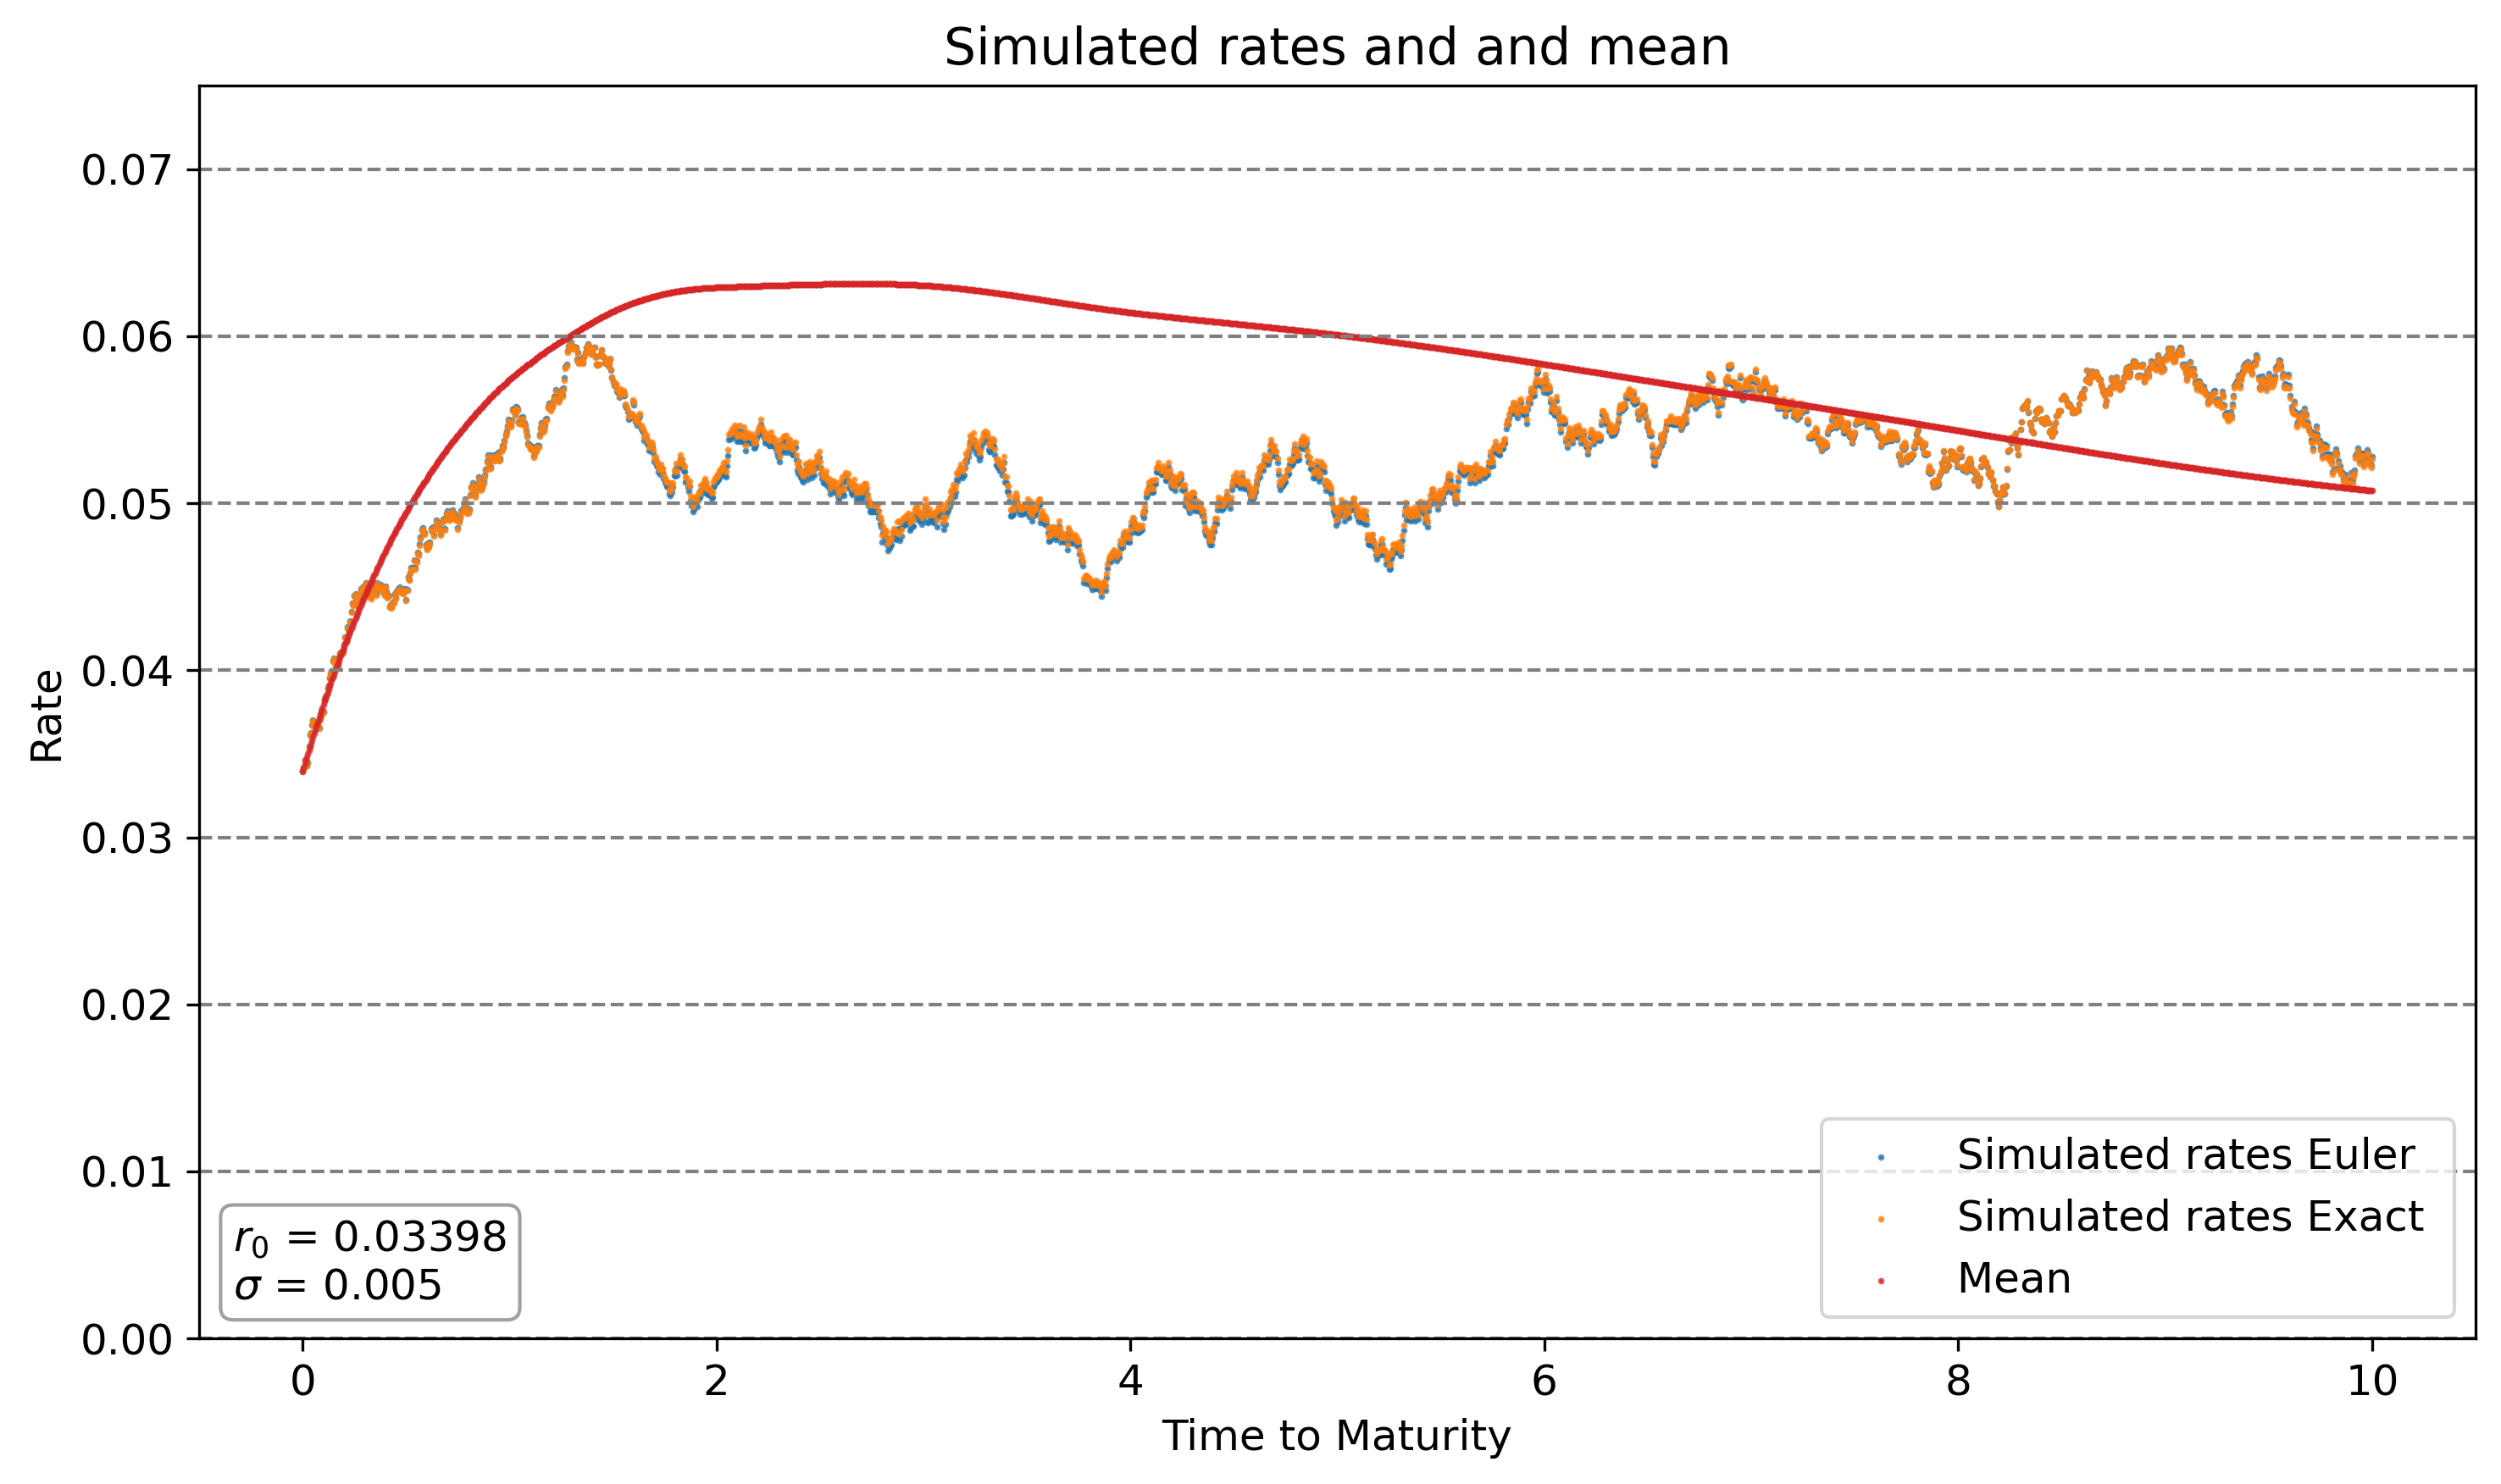

In [13]:
simul_rates = [{'label':'Simulated rates Euler', 'x':t_simul, 'y':r_simul_euler,'s':3},
               {'label':'Simulated rates Exact', 'x':t_simul, 'y':r_simul_exact,'s':3},
               {'label':'Mean', 'x':t_simul, 'y':mean_ho_lee,'s':3,}]
text = {'$r_0$':f'{r0:.5f}', '$\sigma$':f'{sigma:.3f}'}

plot.rates(simul_rates,title='Simulated rates and and mean',text=text)

#### (c) Use the explicit solution you have found for $r_T \mid r_t$ to construct upper, lower and two sided confidence intervals for $r_t$ and include a two-sided 95 per cent confidence interval in your plot

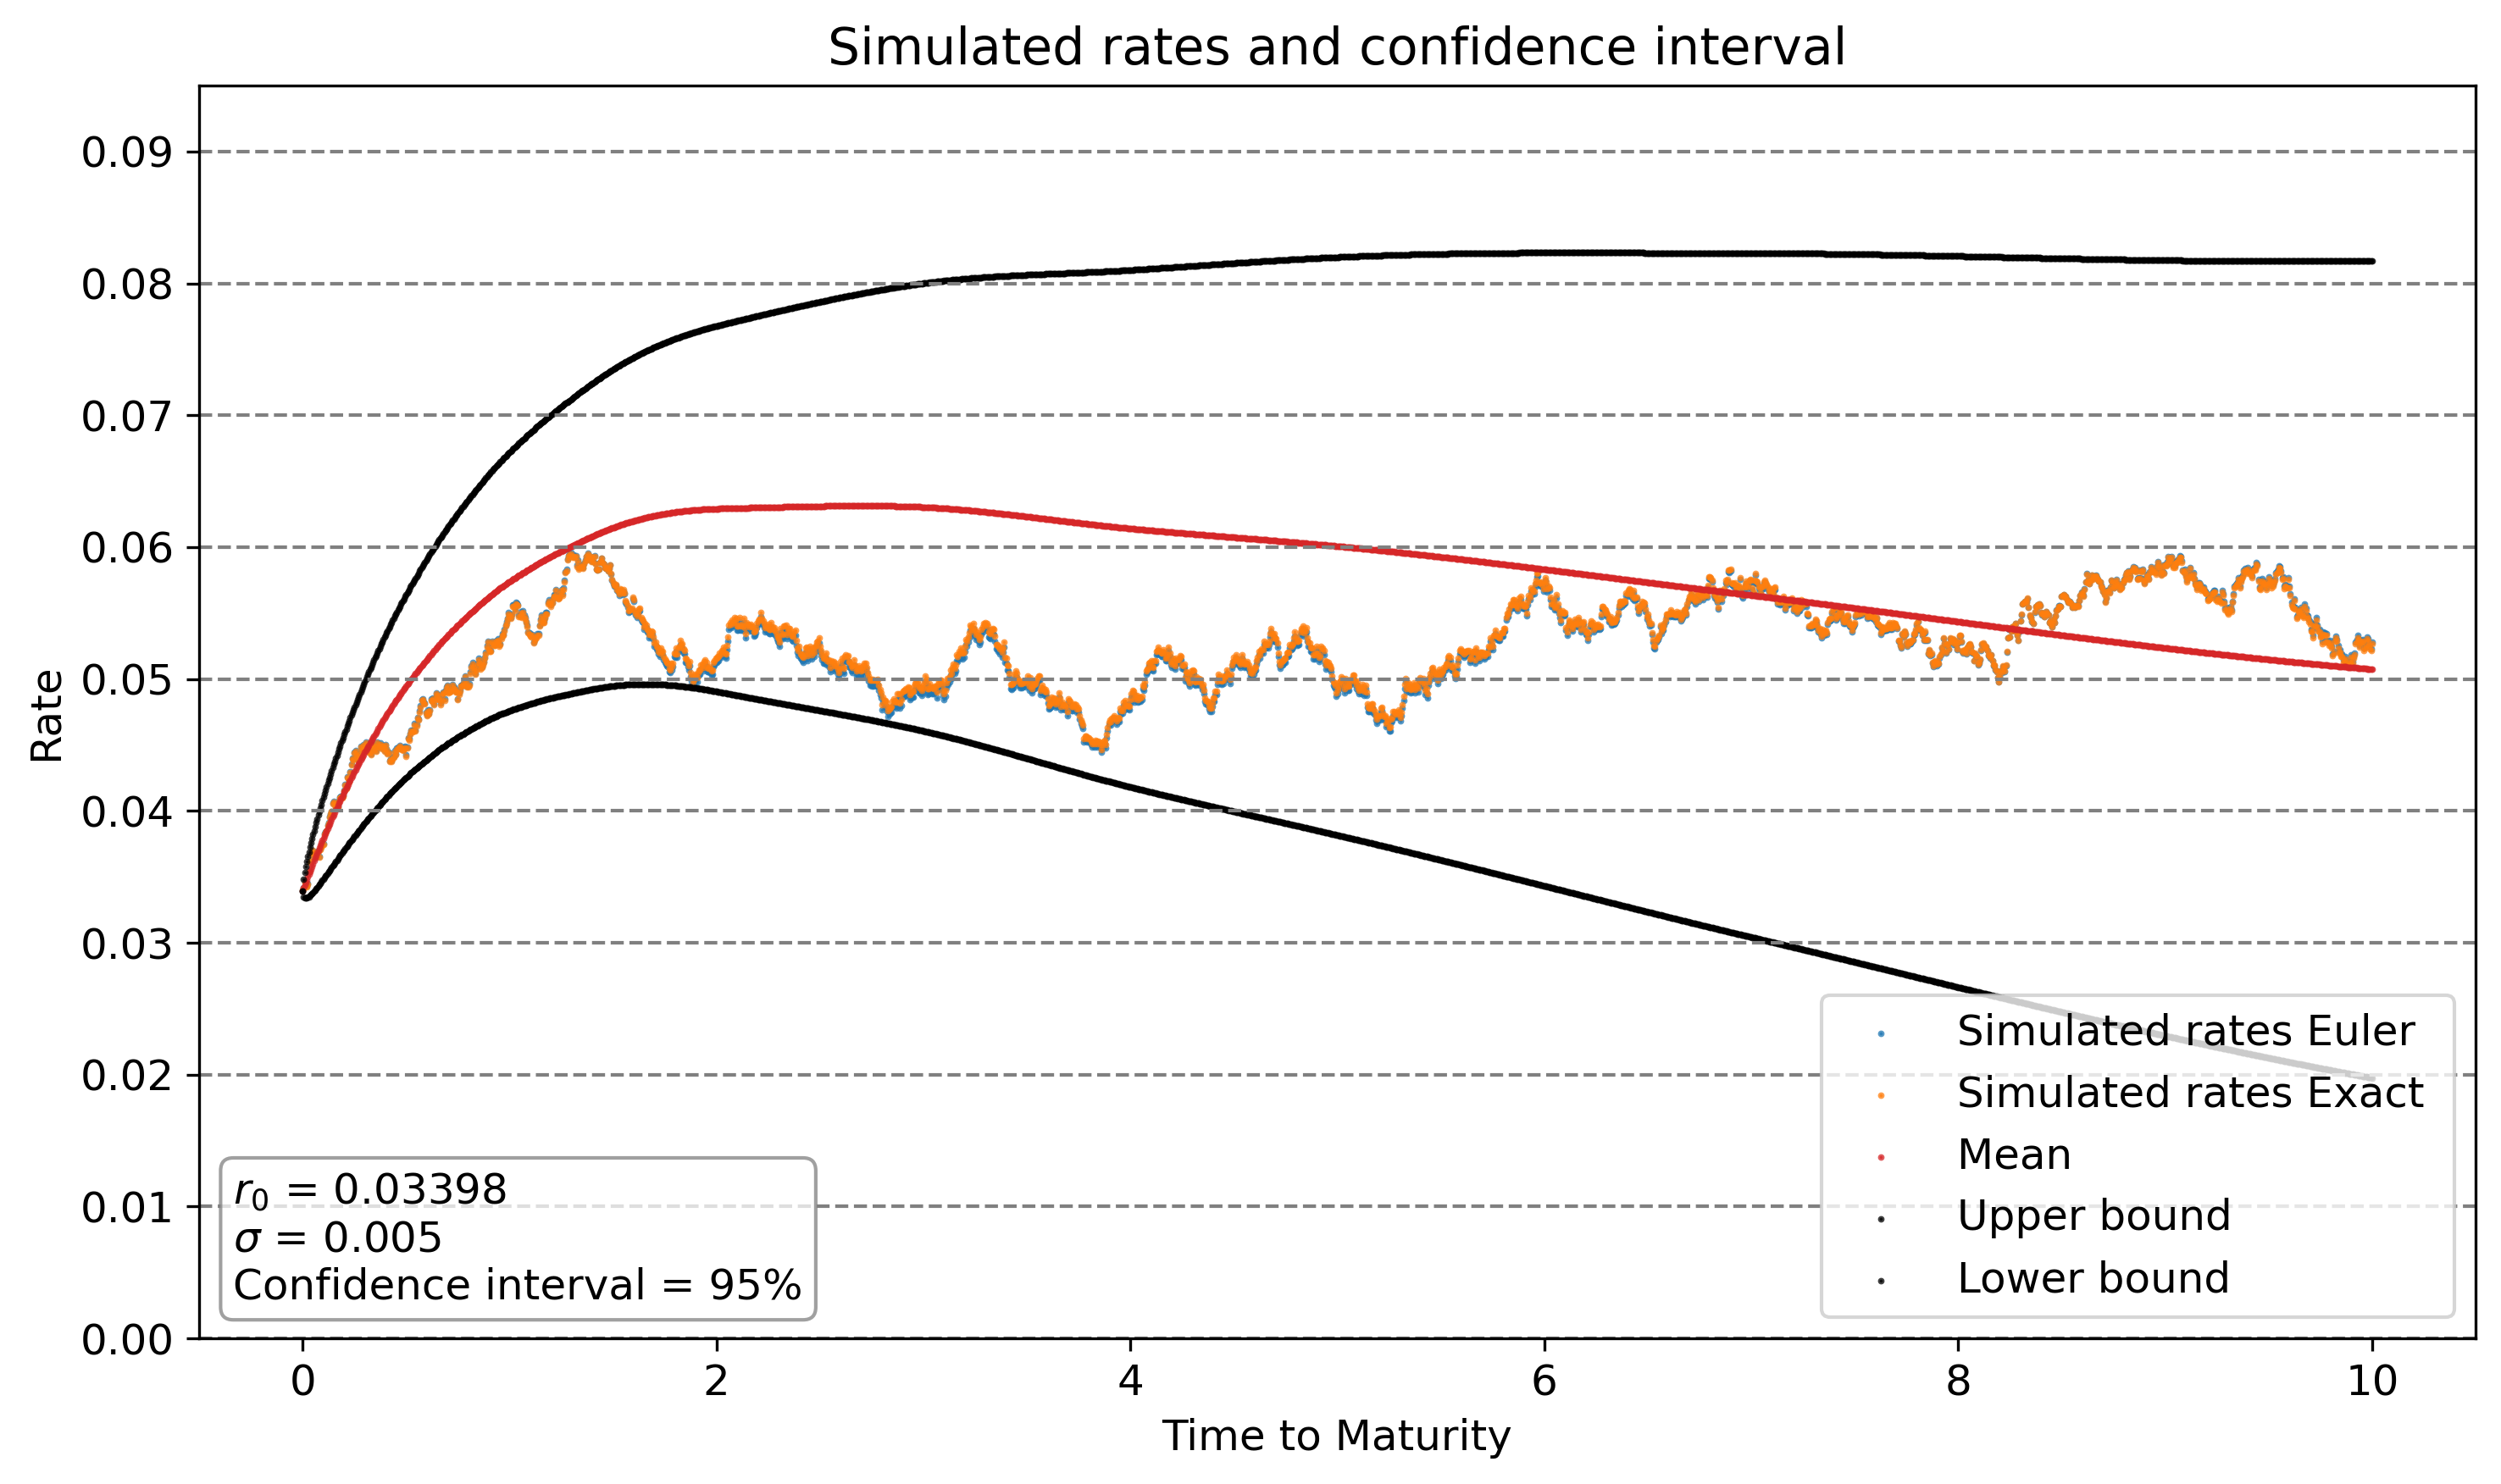

In [14]:
size_ci = 0.95
lb, ub = fid.ci_ho_lee(f_simul,sigma,t_simul,size_ci,type_ci = "two_sided")
simul_rates_ci = simul_rates.copy()
simul_rates_ci.append({'label':'Upper bound', 'x':t_simul,'y':ub,'color':'black','s':3})
simul_rates_ci.append({'label':'Lower bound', 'x':t_simul,'y':lb,'color':'black','s':3})
text = {'$r_0$':f'{r0:.5f}', '$\sigma$':f'{sigma:.3f}', 'Confidence interval':f'{size_ci:.0%}'}

plot.rates(simul_rates_ci,title='Simulated rates and confidence interval',text=text)

#### (d) Evaluate what happens to the distribution of the short rate in the Ho-Lee model when $t$ grows large. Does the short rate mean-revert in this model and does it make sense to talk about the ”asymptotic” properties of $r_t$ in the Ho-Lee model?
As we see in the Ho-Lee model the confidence bounds are getting wider as $t$ grows large - unlike in the Vasicek model where the reach a constant level at the stationary distribtion. 
Here there is a fundamental difference which. In the Ho-Lee model does we do not have mean reversion nor a stationary distribution hence as time increases the confidence bounds will increase as well.

## Problem 7 - Pricing a swaption in the Ho-Lee model
Finally, we will find the price of a $1Y4Y$ receiver swaption with a strike of $K = 0.06$. The receiver swaption gives the owner the right but not obligation to enter into an $4Y$ receiver swap at exercise in $T_n = 1$ years. To compute the price of this swaption, you will need to simulate the short rate.

#### (a) Argue that the payoff function $\chi(T_n)$ and the discounted payoff function $\tilde{\chi}(T_n)$ of the payer swaption are $$ \chi(T_n) = S_n^N(T_n)(K-R_n^N(T_n))_+ $$ $$\tilde{\chi}(T_n) = \exp\left\{-\int_0^{T_n}r_tdt\right\}S_n^N(T_n)(K-R_n^N(T_n))_+$$

At the exercise time $T_n=1$ year, the holder has the right to enter into a 4-year receiver swap. The **payoff function** $\chi(T_n)$ represents the net benefit from exercising this option. Specifically, if the prevailing swap rate $R_n^N(T_n)$ is below the strike of $K=0.06$, the holder benefits by receiving the higher fixed rate $K$ instead of the (lower) market rate. This benefin is scaled by the swap annuity $S_n^N(T_n)$, leading to 
$$ \chi(T_n) = S_n^N(T_n)(K-R_n^N(T_n))_+ $$
where $(\cdot)_+$ denotes the positive part.
The **discounted payoff function** $\tilde{\chi}(T_n)$ accounts for the present value of the future payoff by discounting it back to the initial time using the accumulated short rates This ensures that the option price reflects the time value of money under the Ho-Lee model.
$$\tilde{\chi}(T_n) = \exp\left\{-\int_0^{T_n}r_tdt\right\}S_n^N(T_n)(K-R_n^N(T_n))_+ = \exp\left\{-\int_0^{T_n}r_tdt\right\}\chi(T_n)$$
Thus, by structuring the payoff and its discounting in this manner, the Ho-Lee model ensures that the receiver swaption's price accurately captures the economic benefits and risks associated with entering the swap at the specified strike rate.

#### (b) Find a method to compute the price at $t = 0$ of the swaption by simulating at least $N = 1000$ trajectories and having at least $M = 1000$ steps in your simulation

In [15]:
strike = 0.06
T_n, T_N, alpha = 1, 5, 0.5
M_simul_swaption, N_simul = 1000, 1000
chi, price_swaption_simul, price_swaption_plot = np.zeros([N_simul]), np.zeros([N_simul]), np.zeros([N_simul])
mesh_simul_swaption = T_n/M_simul_swaption
t_swaption = np.array([i*mesh_simul_swaption for i in range(0,M_simul_swaption+1)])
f_swaption, f_T_swaption = fid.interpolate(t_swaption,T_fit,f_fit,interpolation_options)
f_t = fid.for_values_in_list_find_value_return_value(T_n,T_inter,f_star)
T_swaption = np.array([i*alpha for i in range(int(T_n/alpha),int(T_N/alpha)+1)])
p_swaption = fid.zcb_price_ho_lee(T_n,T_swaption,0,sigma,T_inter,p_inter,f_t)
T_swap = np.array([i*alpha for i in range(0,int((T_N-T_n)/alpha)+1)])
np.random.seed(2025)
for i in range(0,N_simul):
    r_simul_swaption = fid.simul_ho_lee(r0,f_T_swaption,sigma,T_n,method = "euler",seed = None)
    p_swap = p_swaption.copy()
    for j, T_j in enumerate(T_swaption):
        p_swap[j] = p_swaption[j]*np.exp(-(T_swaption[j]-T_n)*r_simul_swaption[-1])
    R_swap, S_swap = fid.swap_rate_from_zcb_prices(0,0,T_N-T_n,"semiannual",T_swap,p_swap)
    chi[i] = max(strike-R_swap,0)*S_swap
    price_swaption_simul[i] = np.exp(-(T_n/M_simul_swaption)*sum(r_simul_swaption))*chi[i]
    price_swaption_plot[i] = sum(price_swaption_simul[0:i+1])/(i+1)
print(f"price swaption (bps): {price_swaption_plot[-1]*10000}")

price swaption (bps): 31.727032899753965


#### (c) Investigate if the price you have computed is accurate by plotting the value of the derivative for various choices of $N$

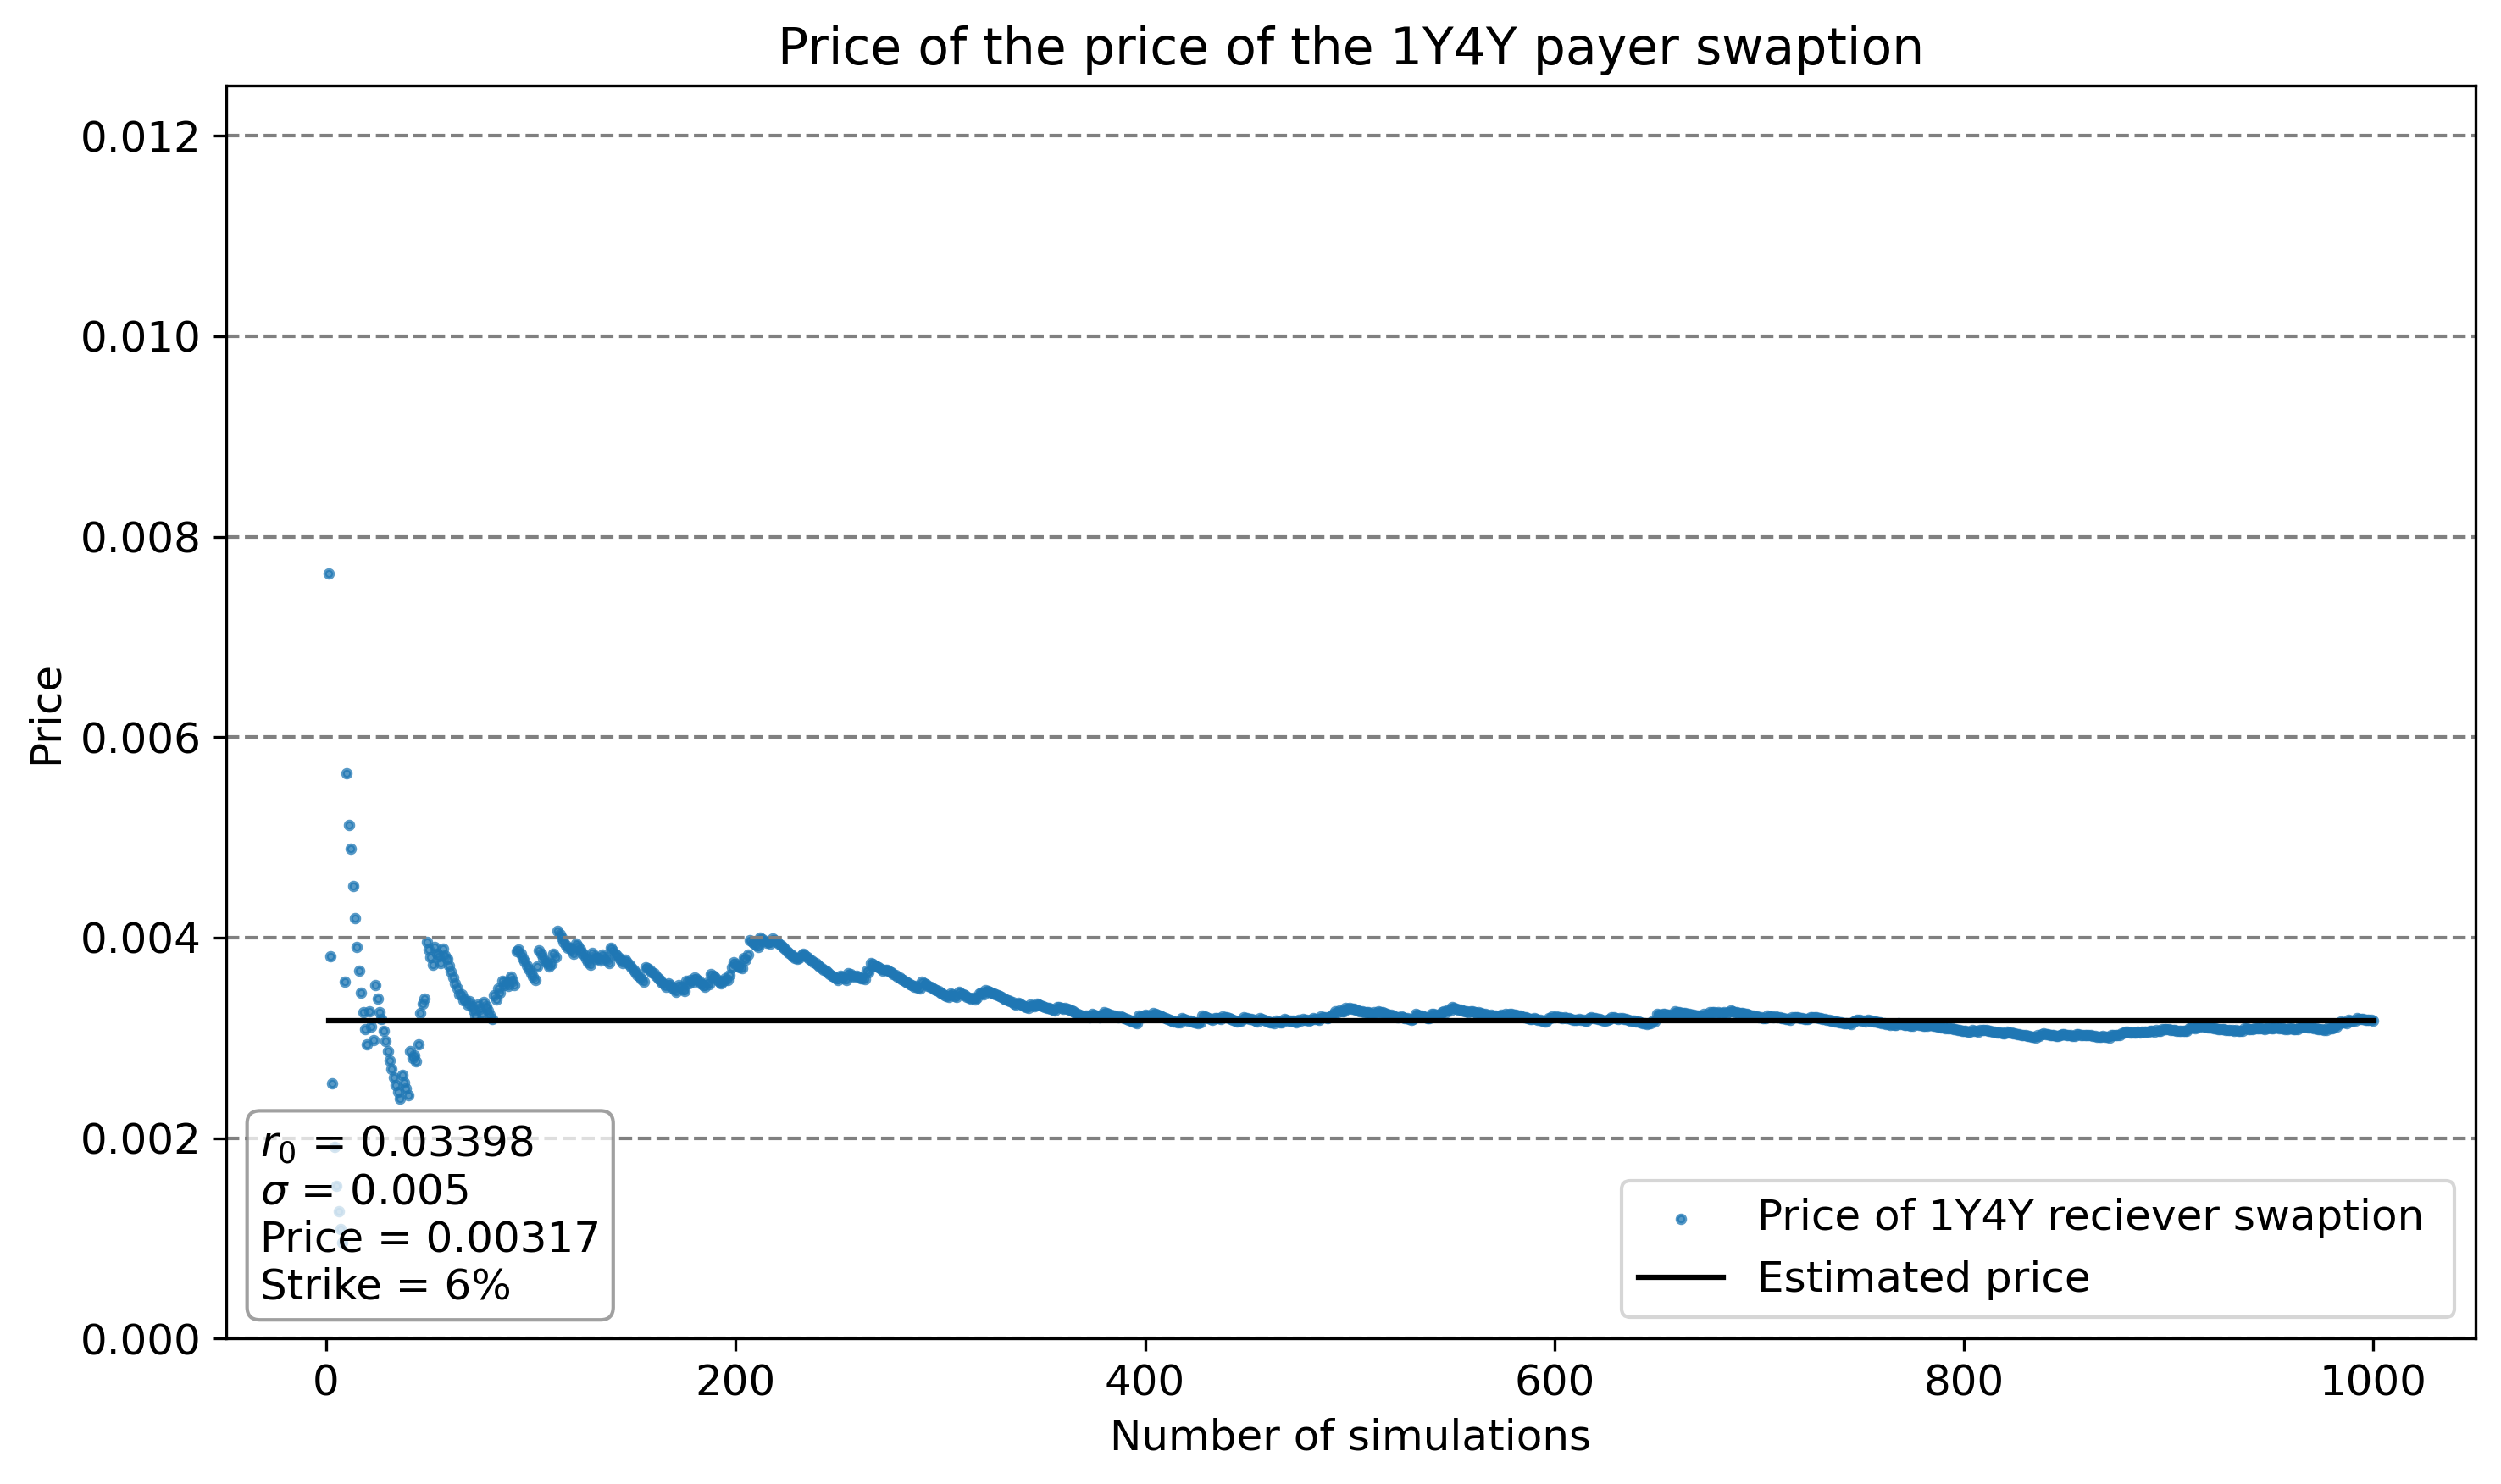

In [16]:
swap_plot = [{'label':'Price of 1Y4Y reciever swaption','x':[n+1 for n in range(N_simul)],'y':price_swaption_plot},
             {'label':'Estimated price','x':[n+1 for n in range(N_simul)],'y':price_swaption_plot[-1]*np.ones([N_simul]),'type':'line', 'color':'black'}]
text = {'$r_0$':f'{r0:.5f}', '$\sigma$':f'{sigma:.3f}', 'Price':price_swaption_plot[-1], 'Strike':f'{strike:.0%}'}

plot.rates(swap_plot, title='Price of the price of the 1Y4Y payer swaption',xlabel='Number of simulations', ylabel='Price',text=text)

We see that for a smaller number of simulations the price is not accurate, but as we increase the number of simulations the price converges to what we can only assume to be the true price $\sim 32$ BPS

#### (d) Explain how the price of the swaption depends on $\sigma$, $T_n$, $T_N$ and of course $K$
The price of a $1Y4Y$ reciever swaption within the Ho-Lee model is influenced by all of $\sigma$, $T_n$, $T_N$ and of course $K$.

- **Volatility ($\sigma$):** Positive Relationship: An increase in $\sigma$ heightens the uncertainty or variability of short rates. Higher volatility means there's a greater probability that the swap rate $R_n^N(T_n)$ will fall below the strike $K$, increasing the value of the receiver swaption. As $\sigma$ rises, the swaption becomes more valuable because the potential for favorable rate movements increases, leading to a higher option price.
- **Exercise Time ($T_n$):** Positive Relationship with Time Until Exercise: While $T_n$ is fixed at 1 year in this scenario, generally, a longer time until exercise allows more opportunities for interest rates to fluctuate. Extending $T_n$ would typically increase the swaption's price due to the extended period over which rates can move advantageously. However, since $T_n =1$ year is predetermined, its direct influence is encapsulated in the model's discounting and rate dynamics up to that point.
- **Swap Maturity ($T_N$):** Positive Relationship: A longer swap maturity $T_N$ (i.e., a longer swap period of 4 years starting at $T_n=1$ year) provides a broader timeframe for interest rates to evolve. Extending $T_N$ increases the option's value because there are more periods during which the fixed rate $K$ can outperform the floating rates, enhancing the potential payoff from exercising the swaption.
- **Strike Rate ($K$):** Inverse Relationship: The strike rate $K$ represents the fixed rate the holder can receive. A higher $K$ makes it more challenging for the floating swap rates to drop below $K$, reducing the probability of a favorable payoff. As $K$ increases, the swaption's price decreases because the likelihood of the swap rate $R_n^N(T_n)$ being less than $K$ diminishes, making the option less attractive.

**Summary:**
- $\sigma \uparrow \Rightarrow$ Swaption Price $\uparrow$ 
- $T_n \uparrow \Rightarrow$ Swaption Price $\uparrow$
- $T_N \uparrow \Rightarrow$ Swaption Price $\uparrow$
- $K \uparrow \Rightarrow$ Swaption Price $\downarrow$

#### (e) Discuss which types of financial institutions might need a receiver swaption to manage their interest rate risk
**1. Banks:**
Asset-Liability Management: Banks with significant fixed-rate assets (like fixed-rate loans) may use receiver swaptions to hedge against declining interest rates, ensuring stable returns.
Interest Income Protection: By holding receiver swaptions, banks can secure the right to receive fixed rates, protecting their interest income from adverse rate movements.

**2. Insurance Companies:**
Matching Liabilities: Insurance firms often have long-term fixed-rate liabilities. Receiver swaptions help align these liabilities with fixed-rate assets, mitigating the risk of rate fluctuations.
Investment Strategy: They use receiver swaptions to enhance portfolio returns when expecting lower interest rates, balancing their investment and liability profiles.

**3. Pension Funds:**
Funding Obligations: Pension funds with fixed payment obligations benefit from receiver swaptions by locking in fixed rates, ensuring they can meet future payouts regardless of market rate declines.
Risk Management: These swaptions provide a hedge against interest rate volatility, stabilizing the fund's financial health.

**4. Corporations:**
Debt Management: Corporations with substantial fixed-rate debt might employ receiver swaptions to hedge against falling interest rates, ensuring their cost of borrowing remains predictable.
Investment Portfolios: Firms with fixed-income investments use receiver swaptions to protect against declining yields, preserving the value of their investment portfolios.

**5. Investment Firms and Hedge Funds:**
Speculative Strategies: These entities might use receiver swaptions to speculate on declining interest rates, aiming to capitalize on favorable rate movements.
Portfolio Hedging: To manage interest rate exposure within diversified portfolios, investment firms incorporate receiver swaptions as part of their risk mitigation strategies.